In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import os
os.getcwd()

'C:\\Users\\ihamz\\Downloads\\archive'

In [ ]:
df1 = pd.read_csv("Accident_Information.csv")

C:\Users\ihamz\AppData\Local\Temp\ipykernel_26908\3171684021.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("Accident_Information.csv")


In [ ]:
df1.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


DATA CLEANING


In [ ]:
df1.isnull().sum()

Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     2
2nd_Road_Class                                 844272
2nd_Road_Number                                 17593
Accident_Severity                                   0
Carriageway_Hazards                                 0
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       278
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          174
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             164
Location_Northing_OSGR                            164
Longitude                   

In [ ]:
cols_to_be_dropped = ['1st_Road_Class','1st_Road_Number','2nd_Road_Class','2nd_Road_Number','LSOA_of_Accident_Location']
df1.drop(columns = cols_to_be_dropped,inplace=True)

In [ ]:
df1.shape

(2047256, 29)

In [ ]:
df1.columns

Index(['Accident_Index', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

In [ ]:
#Handling all the missing values
df1.dropna(inplace=True)

In [ ]:
#checking again for missing values
df1.isnull().sum()

Accident_Index                                 0
Accident_Severity                              0
Carriageway_Hazards                            0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Control                               0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Number_of_Casualties                           0
Number_of_Vehicles                             0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Police_Force                                   0
Road_Surface_Conditi

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042570 entries, 0 to 2047255
Data columns (total 29 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Accident_Severity                            object 
 2   Carriageway_Hazards                          object 
 3   Date                                         object 
 4   Day_of_Week                                  object 
 5   Did_Police_Officer_Attend_Scene_of_Accident  float64
 6   Junction_Control                             object 
 7   Junction_Detail                              object 
 8   Latitude                                     float64
 9   Light_Conditions                             object 
 10  Local_Authority_(District)                   object 
 11  Local_Authority_(Highway)                    object 
 12  Location_Easting_OSGR                        float64
 13  Location_Nor

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y-%m-%d')

In [ ]:
df1.head()

,Accident_Index,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,Serious,None,2005-01-04,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [ ]:
df1.dtypes

Accident_Index                                         object
Accident_Severity                                      object
Carriageway_Hazards                                    object
Date                                           datetime64[ns]
Day_of_Week                                            object
Did_Police_Officer_Attend_Scene_of_Accident           float64
Junction_Control                                       object
Junction_Detail                                        object
Latitude                                              float64
Light_Conditions                                       object
Local_Authority_(District)                             object
Local_Authority_(Highway)                              object
Location_Easting_OSGR                                 float64
Location_Northing_OSGR                                float64
Longitude                                             float64
Number_of_Casualties                                    int64
Number_o

# BASIC EDA

### Casualties Accident Type

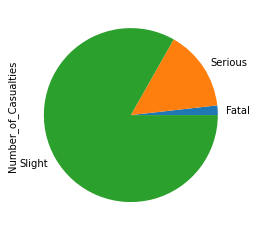

In [ ]:
df1.groupby('Accident_Severity')['Number_of_Casualties'].sum().plot(kind="pie")
plt.show()

### Accidents Day Wise

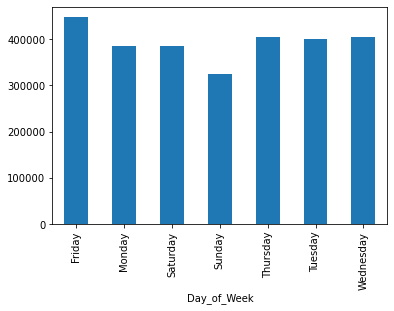

In [ ]:
df1.groupby('Day_of_Week')['Number_of_Casualties'].sum().plot(kind="bar")
plt.show()

### Accidents Month Wise of all Years Together

In [ ]:
df1['Month'] = df1['Date'].dt.month

In [ ]:
p = df1.groupby('Month')['Number_of_Casualties'].sum().reset_index().sort_values('Number_of_Casualties',ascending=False)
p

,Month,Number_of_Casualties
10,11,248672
9,10,245908
6,7,243683
8,9,234771
5,6,232976
4,5,232716
7,8,231162
11,12,225258
2,3,219307
0,1,219156


### Line Plot of Casualties with Years

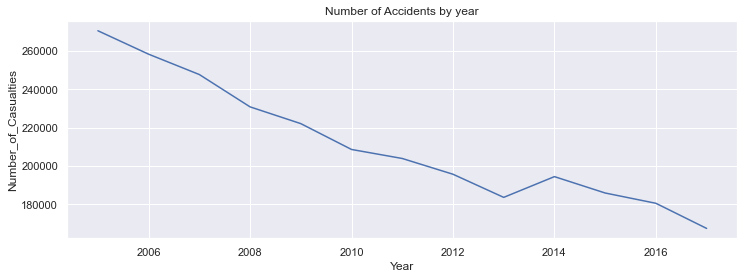

In [ ]:
p = df1.groupby('Year')['Number_of_Casualties'].sum().reset_index().sort_values('Number_of_Casualties',ascending=False)

sns.set(rc={'figure.figsize':(12,4)})
sns.lineplot(data=p,x='Year',y='Number_of_Casualties')
plt.title('Number of Accidents by year')
plt.show()

### Casualties on the basis of Road Type

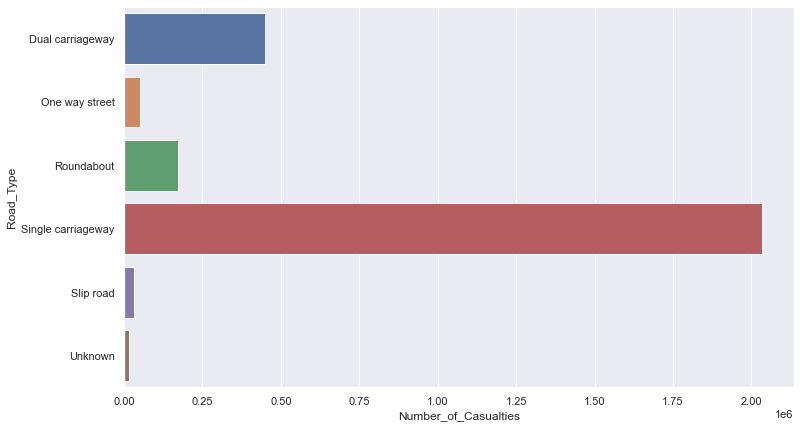

In [ ]:
p = df1.groupby('Road_Type')['Number_of_Casualties'].sum().reset_index()
sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(data=p,x='Number_of_Casualties',y='Road_Type')
plt.show()

### Casualties on the basis of Road Surface COnditions

In [ ]:
df1.groupby('Road_Surface_Conditions')['Number_of_Casualties'].sum()

Road_Surface_Conditions
Data missing or out of range       4003
Dry                             1879969
Flood over 3cm. deep               4152
Frost or ice                      53973
Snow                              16496
Wet or damp                      791376
Name: Number_of_Casualties, dtype: int64

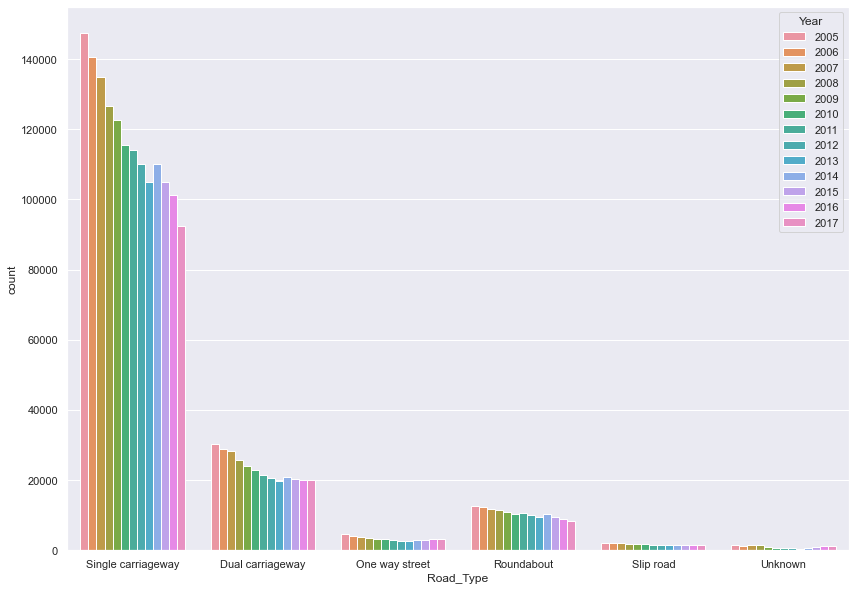

In [ ]:

cx = sns.countplot(data = df1,x='Road_Type',hue='Year')
sns.set(rc={'figure.figsize':(20,10)})
plt.show()

In [ ]:
df1['Speed_limit'].nunique()

9

### Casualties on the basis of Speed Limit

In [ ]:
df1.groupby('Speed_limit')['Number_of_Casualties'].sum().reset_index().sort_values('Number_of_Casualties',ascending=False)


,Speed_limit,Number_of_Casualties
4,30.0,1648320
7,60.0,480485
5,40.0,240938
8,70.0,231407
6,50.0,104470
3,20.0,44308
1,10.0,22
2,15.0,18
0,0.0,1


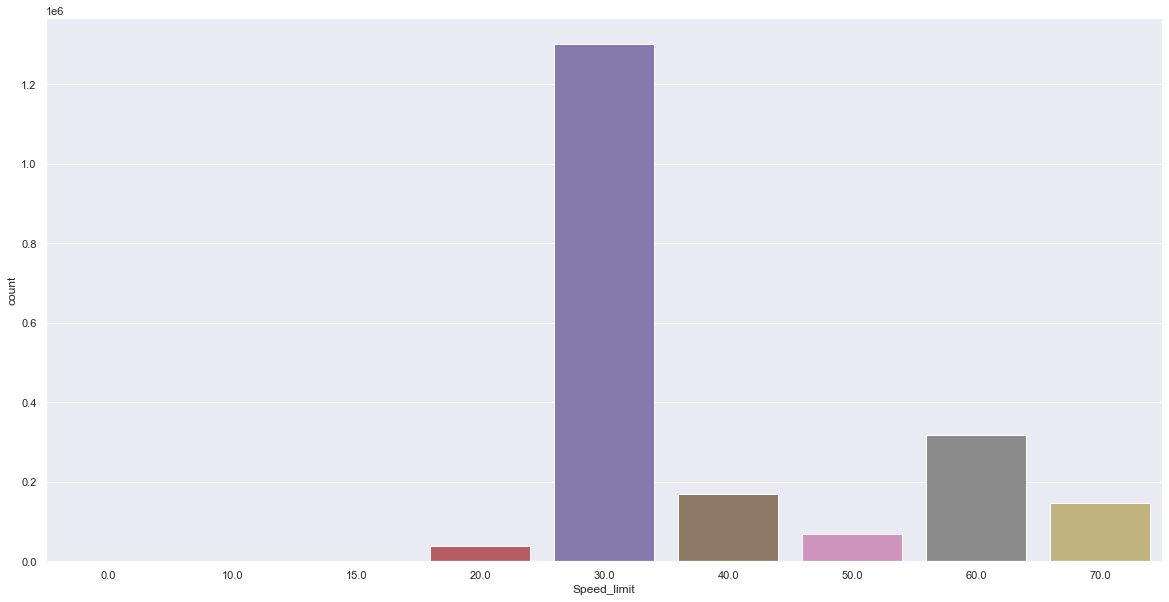

In [ ]:
sns.countplot(data=df1,x='Speed_limit')
sns.set(rc={'figure.figsize':(8,6)})
plt.show()

### Casualties on the basis of weather conditions

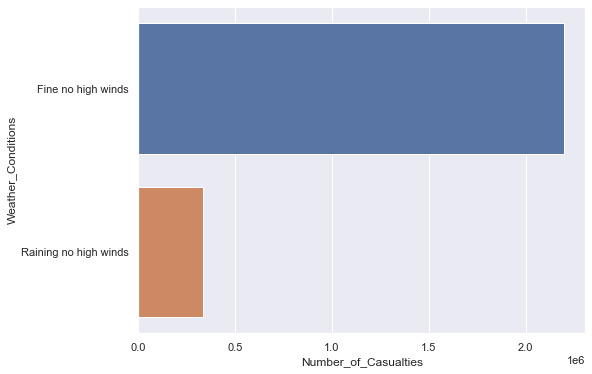

In [ ]:
p = df1.groupby('Weather_Conditions')['Number_of_Casualties'].sum().reset_index().sort_values('Number_of_Casualties',ascending=False).head(2)
sns.barplot(data=p,x='Number_of_Casualties',y='Weather_Conditions')
plt.show()

### Casualties based on time

In [ ]:
p = df1.groupby('Time')['Number_of_Casualties'].sum().reset_index().sort_values('Number_of_Casualties',ascending=False).head(5)
p

,Time,Number_of_Casualties
1019,17:00,25383
1049,17:30,24085
959,16:00,23485
1079,18:00,23174
929,15:30,22906


### Accidents happen mostly in evenings

In [ ]:
df1.groupby('Carriageway_Hazards')['Number_of_Casualties'].sum().reset_index().sort_values('Number_of_Casualties',ascending=False)

,Carriageway_Hazards,Number_of_Casualties
2,None,2698914
3,Other object on road,21542
0,Any animal in carriageway (except ridden horse),14159
4,Pedestrian in carriageway - not injured,5969
5,Previous accident,5531
6,Vehicle load on road,3283
1,Data missing or out of range,571


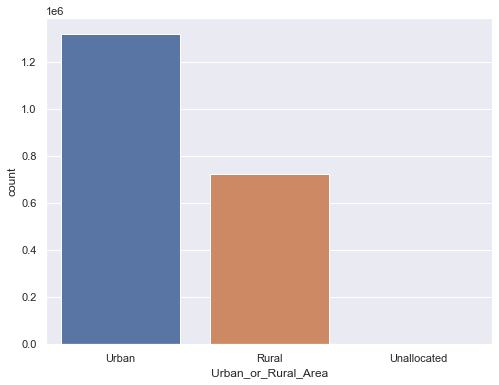

In [ ]:
sns.countplot(data=df1,x='Urban_or_Rural_Area')
plt.show()

### Maximum accidents happened in 2005 So analyzing it

In [ ]:
df_2005 = df1.loc[df1['Year'] == 2005]


In [ ]:
df_2005.groupby('Month')['Number_of_Casualties'].sum().reset_index().sort_values('Number_of_Casualties',ascending=False)

,Month,Number_of_Casualties
10,11,25293
9,10,23900
11,12,23565
6,7,23263
4,5,23168
5,6,22916
7,8,22734
8,9,22565
0,1,21821
3,4,21385


### November 2005 had the most accidents

### Correlation between the columns

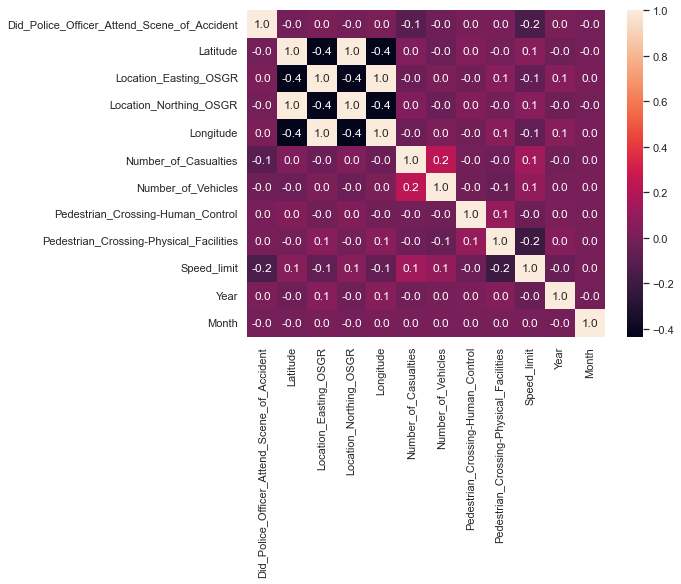

In [ ]:
corr = df1.corr()
sns.heatmap(corr,annot=True,fmt='.1f',linecolor='black')
plt.show()